In [1]:
import sys

sys.path.append("../")


In [2]:
import cheetah
import matplotlib.pyplot as plt
import torch

from src.environments import ea

%matplotlib ipympl

In [3]:
env = ea.TransverseTuning(backend="cheetah", magnet_init_mode="random")
observation, _ = env.reset()
observation["magnets"]


array([-1.6075899e+01,  1.8501873e+01, -5.7270299e-03,  5.0675556e+01,
        3.4066001e-03], dtype=float32)

In [4]:
segment = env.unwrapped.backend.segment
incomcing = env.unwrapped.backend.incoming

incomcing


ParameterBeam(mu_x=-0.000988, mu_xp=0.000066, mu_y=0.000081, mu_yp=-0.000033, sigma_x=0.000087, sigma_xp=0.000008, sigma_y=0.000011, sigma_yp=0.000030, sigma_s=0.000034, sigma_p=0.000617, energy=159462816.000)

In [5]:
incoming_particle_beam = cheetah.ParticleBeam.make_linspaced(
    n=10, **incomcing.parameters
)
incoming_particle_beam


ParticleBeam(n=10, mu_x=-0.000988, mu_xp=0.000066, mu_y=0.000081, mu_yp=-0.000033, sigma_x=0.000059, sigma_xp=0.000006, sigma_y=0.000007, sigma_yp=0.000020, sigma_s=0.000023, sigma_p=0.000415, energy=159462816.000)

In [6]:
split_segments = segment.split(resolution=0.1)

beams = [incoming_particle_beam]
for segment in split_segments:
    beams.append(segment(beams[-1]))


In [7]:
particles = torch.stack(
    [beam.particles for beam in beams if beam != cheetah.Beam.empty]
)
particles.shape


torch.Size([29, 10, 7])

In [8]:
particles.shape


torch.Size([29, 10, 7])

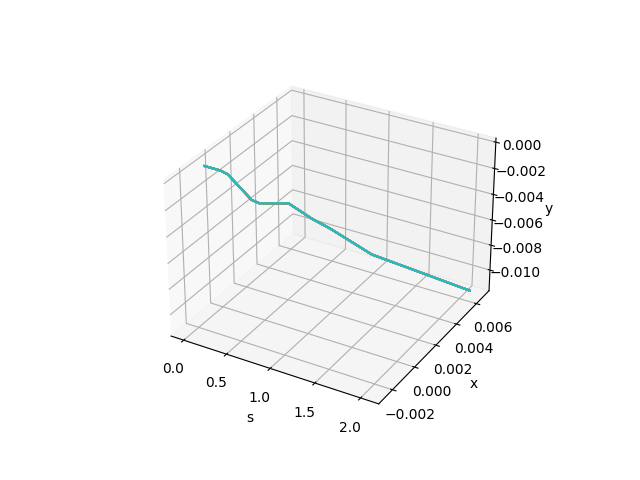

In [19]:
lengths = [s.length for s in split_segments]
# Sum up lengths element-wise
ss = torch.cumsum(torch.tensor(lengths), dim=0)
# Add 0 at the beginning
ss = torch.cat([torch.tensor([0]), ss])
# Remove last element in positin of screen where beam is empty
ss = ss[:-1]

ax = plt.figure().add_subplot(projection="3d")
for particle_idx in range(particles.shape[1]):
    ax.plot(ss, particles[:, 0, 0], particles[:, 0, 2])
ax.set_xlabel("s")
ax.set_ylabel("x")
ax.set_zlabel("y")
plt.show()
